In [1]:
# import statements
datapath = 'datasets/'
from autograd import numpy as np

In [2]:
# import automatic differentiator to compute gradient module
from autograd import grad 

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)
        

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [3]:
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

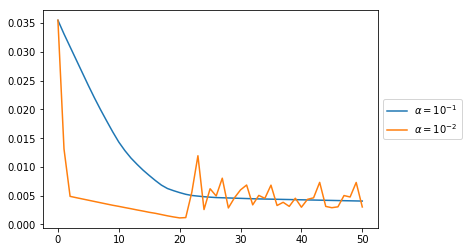

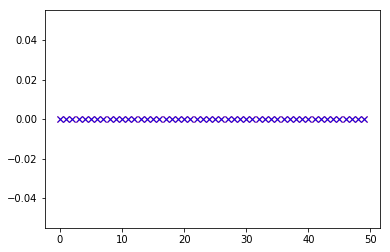

0
0


In [37]:
# load in dataset
csvname = datapath + '3d_classification_data_v0.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:-1,:]
y = data[-1:,:] 
x0 = np.insert(x,0,1,axis=0)
g1 = perceptron_cost
g2 = perceptron_cost
w = 0.1*np.random.randn(3,1) 
max_its = 50
alpha1 = 10**(-2)
alpha2 = 10**(-1)
weight_history1, cost_history1 = gradient_descent(g1,alpha1,max_its,w)
weight_history2, cost_history2 = gradient_descent(g2,alpha2,max_its,w)
yfit1 = model(x0,weight_history1[-1])
yfit2 = model(x0,weight_history2[-1])
for i in range(0,len(yfit1.T)):
    if(yfit1.T[i]> 0):
        yfit1.T[i] = 1
    else:
        yfit1.T[i] = -1
for i in range(0,len(yfit2.T)):
    if(yfit2.T[i]> 0):
        yfit2.T[i] = 1
    else:
        yfit2.T[i] = -1    
plot_cost_histories([cost_history1,cost_history2],labels = [r'$\alpha = 10^{-1}$',r'$\alpha = 10^{-2}$'])
plt.figure()
for k in range(max_its):
    mis1 = identity_func(yfit1,y)
    plt.plot(k,mis1,'rx')
    
for k in range(max_its):
    mis2 = identity_func(yfit2,y)
    plt.plot(k,mis2,'bx')
plt.show()
print(mis1)
print(mis2)



In [30]:
def model(x0,w):
    a =  np.dot(x0.T,w)
    return a.T

In [31]:
def perceptron_cost(w):
    a = model(x0,w)
    cost = 0
    for i in range(0,np.size(y)):
        cost +=max(0,-y[0][i]*a[0][i])
    return cost/float(np.size(y))

In [36]:
def identity_func(yfit,y):
    no_of_miscalc = 0;

    for i in range(0,y.size):
        if(yfit.T[i] != y.T[i]):
            no_of_miscalc +=1
        return no_of_miscalc
    

    